<a href="https://colab.research.google.com/github/AdityaDesale/MIS_515/blob/main/Peer_to_Peer_Revison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('credit1.csv')

In [ ]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [ ]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'telephone', 'foreign_worker', 'job'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_length     1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   personal_status       1000 non-null   object
 9   other_debtors         1000 non-null   object
 10  residence_history     1000 non-null   int64 
 11  property              1000 non-null   object
 12  age                   1000 non-null   int64 
 13  installment_plan      1000 non-null   object
 14  housing               1000 non-null   object
 15  existing_credits      1000 non-null   i

In [ ]:
num_columns=[]
str_columns=[]
for col in df.columns:
    if type(df[col][0])==str:
        str_columns.append(col)
    else:
        num_columns.append(col)

In [ ]:
num_columns

['months_loan_duration',
 'amount',
 'installment_rate',
 'residence_history',
 'age',
 'existing_credits',
 'default',
 'dependents']

In [ ]:
num_columns.pop(-2)

'default'

In [ ]:
num_columns

['months_loan_duration',
 'amount',
 'installment_rate',
 'residence_history',
 'age',
 'existing_credits',
 'dependents']

In [ ]:
str_columns

['checking_balance',
 'credit_history',
 'purpose',
 'savings_balance',
 'employment_length',
 'personal_status',
 'other_debtors',
 'property',
 'installment_plan',
 'housing',
 'telephone',
 'foreign_worker',
 'job']

In [ ]:
for col in df.columns:
    if df[col].isna().any():
        print(col)

In [ ]:
df.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

In [ ]:
y=df['default']
df.drop(['default'],axis=1,inplace=True)

array([[<AxesSubplot:title={'center':'months_loan_duration'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'installment_rate'}>],
       [<AxesSubplot:title={'center':'residence_history'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'existing_credits'}>],
       [<AxesSubplot:title={'center':'dependents'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

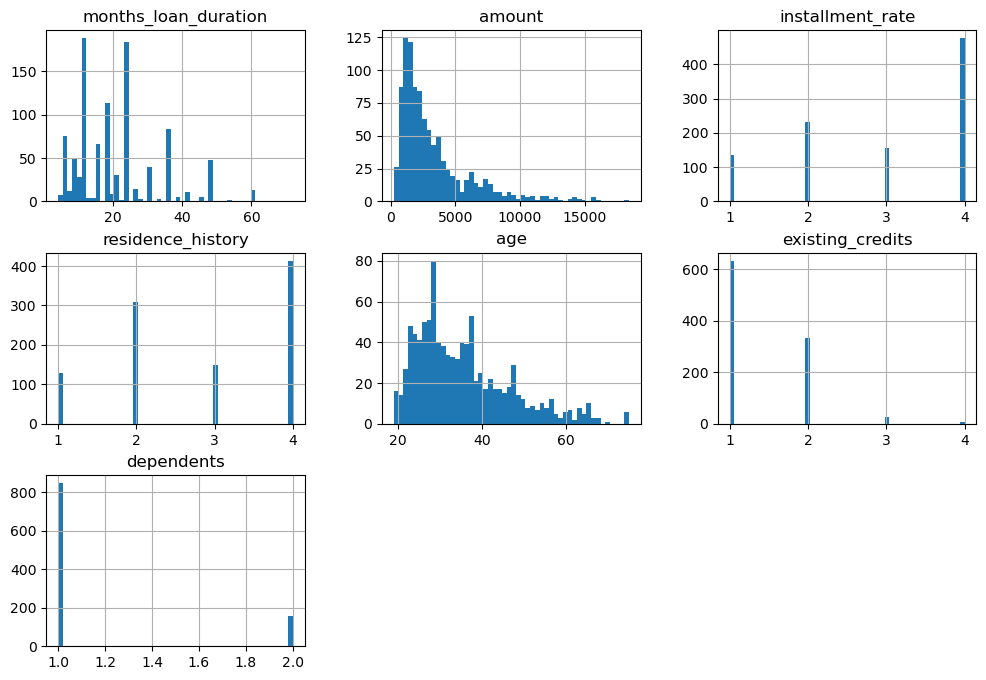

In [ ]:
df.hist(bins=50,figsize=(12,8))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
num_pipeline=Pipeline([("scaler", MinMaxScaler())])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
cat_pipeline=Pipeline([("ordinal_encoder", OrdinalEncoder()),
                      ("cat_encoder", OneHotEncoder()),
                      ])

In [ ]:
from sklearn.compose import ColumnTransformer
preprocess_pipeline=ColumnTransformer([("num",num_pipeline,num_columns),("cat", cat_pipeline, str_columns)])

In [ ]:
X_train=preprocess_pipeline.fit_transform(df)
X_train

array([[0.02941176, 0.05056674, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.64705882, 0.31368989, 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [0.11764706, 0.10157368, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.11764706, 0.03048311, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.60294118, 0.08776274, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.60294118, 0.23803235, 0.66666667, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X_train,y_train,stratify=y_train,test_size=0.2,random_state=False)


In [ ]:
y_train=y
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(n_estimators=100,random_state=42)
forest_clf.fit(X_train1,Y_train1)

RandomForestClassifier(random_state=42)

In [ ]:
forest_scores = cross_val_score(forest_clf, X_train1, Y_train1, cv=10)
forest_scores.mean()

0.77625

In [ ]:
from sklearn.svm import SVC
svm_clf=SVC(gamma="auto")
svm_scores=cross_val_score(svm_clf,X_train1,Y_train1,cv=10)
svm_scores.mean()

0.7112499999999999

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

C:\Users\Sarthak\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sarthak\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [ ]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
grid_search.best_score_

0.731

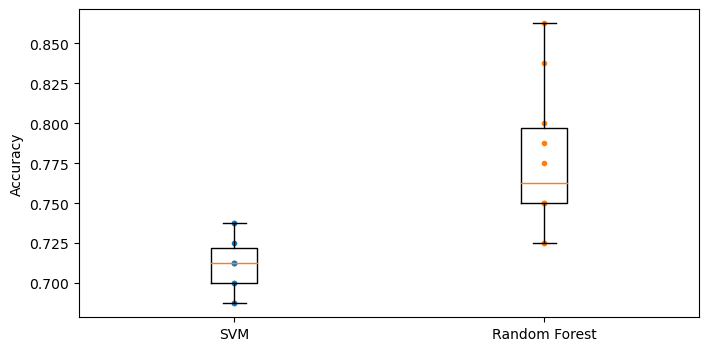

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.plot([3]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy")
plt.show()